# Ансамблирование: бэггинг, случайный лес

> Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются базовыми.

Существует три основных способа построения ансамблей:

- **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

> **Бэггинг** (*bagging*) — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам ***случайный лес** (*Random Forest*).

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи **классификации** ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи **регрессии** же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Давайте рассмотрим это на примере. 

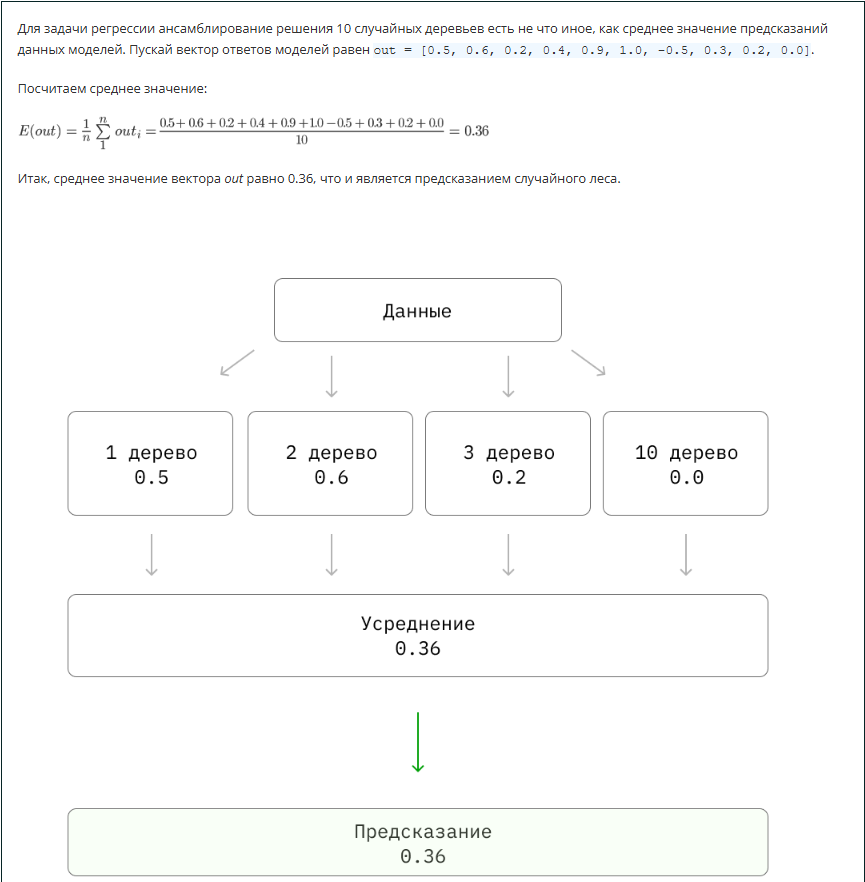

### Задание 2.1

Что можно сказать о предсказаниях случайного леса на тестовых данных для задачи регрессии, если модель обучалась и была успешно обучена на данных с неотрицательной целевой меткой?

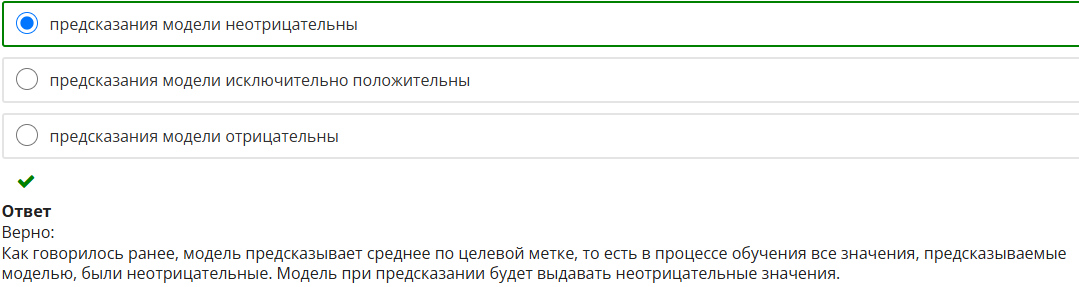

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём [датасет по решению задачи на прогрессирование диабета](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

In [23]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

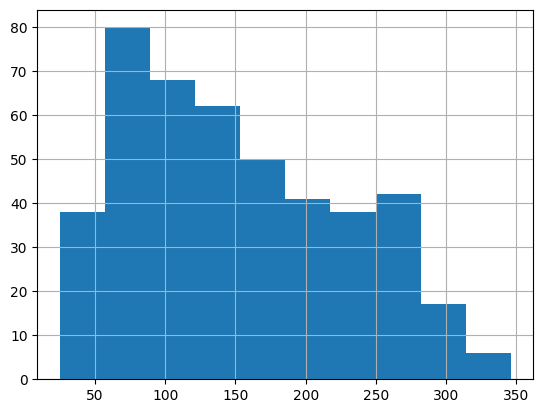

In [5]:
# Посмотрим на распределение целевого признака
y.hist()

In [24]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


In [25]:
# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)


 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')


# Будет выведено:
# Качество предсказания по MSE для решающего дерева 6132.51
# Качество предсказания по MSE для случайного леса  3548.31

Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


### Задание 2.2

Что можно сказать о качестве предсказания моделей?

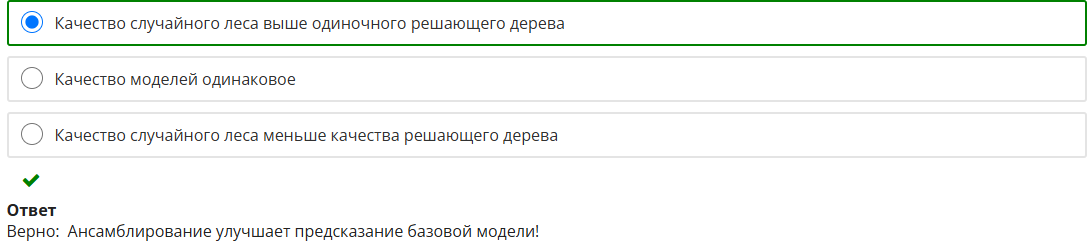

### Задание 2.3

В каком модуле scikit-learn реализован случайный лес?

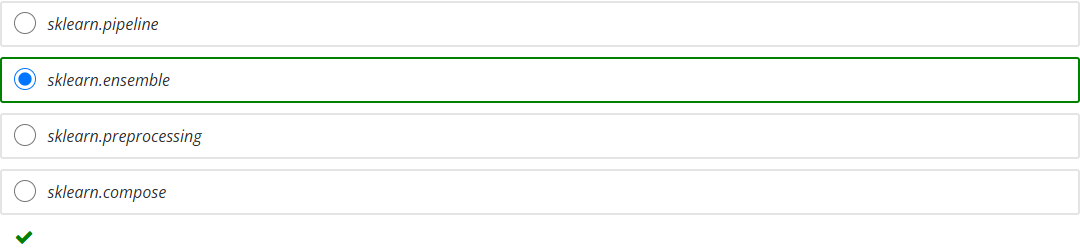

### Задание 2.4

Какой параметр в случайном лесу (RandomForestRegressor()) отвечает за количество деревьев в нём?

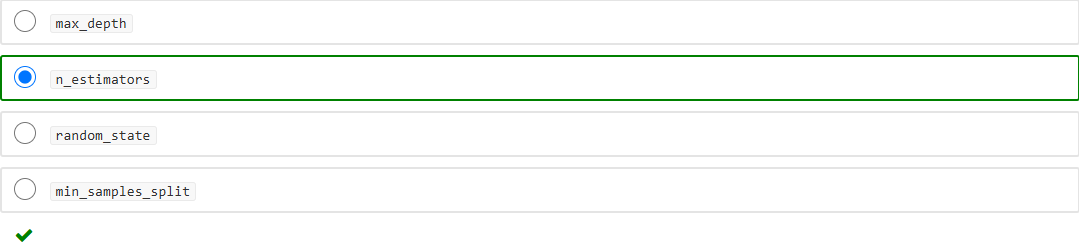

### Задание 2.5

Какой параметр в случайном лесу (RandomForestRegressor()) отвечает за глубину деревьев в нём?

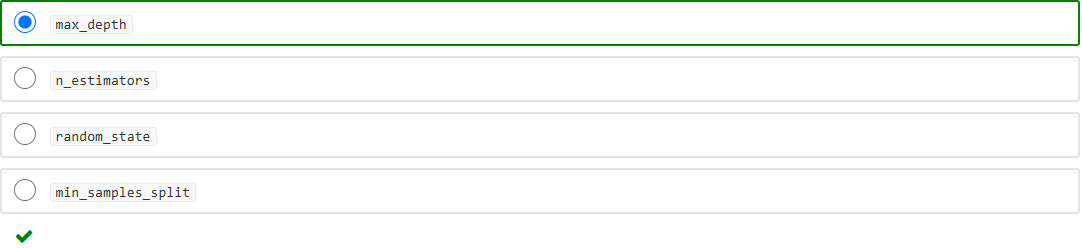

⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем дисперсия отдельной базовой модели.

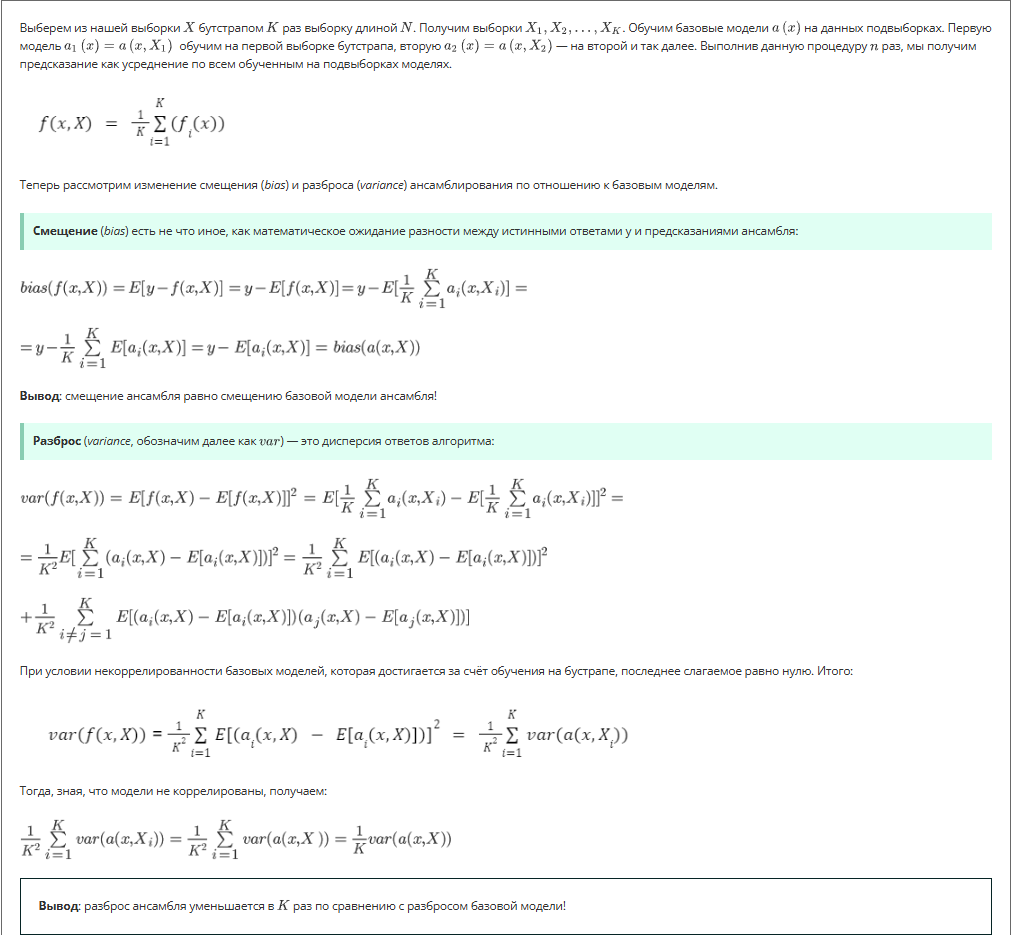

Эта методика применима не только к решающим деревьям, но и к другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

Представь, что у тебя есть команда прогнозистов погоды, и каждый из них дает свой прогноз температуры на завтра.

Допустим, у тебя есть 5 прогнозистов:

Первый говорит, что будет 10°C,
Второй — 12°C,
Третий — 9°C,
Четвертый — 11°C,
Пятый — 10°C.
Ты решаешь сделать ансамбль — взять среднее значение их прогнозов:

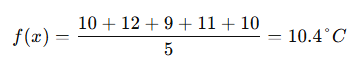

Теперь рассмотрим две ключевые вещи: смещение и разброс.

1. Смещение (bias)
Смещение показывает, насколько предсказания ансамбля в среднем отклоняются от истинной температуры.
Допустим, настоящий прогноз погоды — 11°C. Тогда смещение:

***bias=11−10.4=0.6°C***

Если все модели в среднем ошибаются в одном и том же направлении, ансамбль тоже будет иметь такое же смещение.

2. Разброс (variance)
Разброс показывает, насколько сильно предсказания отдельных прогнозистов различаются между собой.

Если у всех прогнозистов примерно одинаковые значения (например, все говорят от 10 до 12°C), разброс будет небольшим.

Но если один говорит 5°C, другой 15°C, а третий 20°C, разброс будет огромным!

Формула показывает, что чем больше прогнозистов ты используешь и чем менее они похожи друг на друга, тем меньше общий разброс ансамбля.

Вывод:
Смещение ансамбля остается таким же, как у отдельных прогнозистов.
Разброс ансамбля уменьшается, если прогнозисты дают разные независимые прогнозы.
Именно поэтому ансамбли так хороши в машинном обучении — они помогают уменьшить

### Ансамблевое предсказание

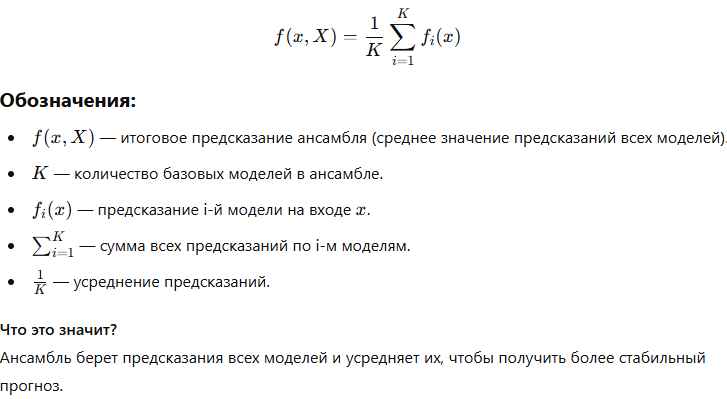

### Смещение (bias)

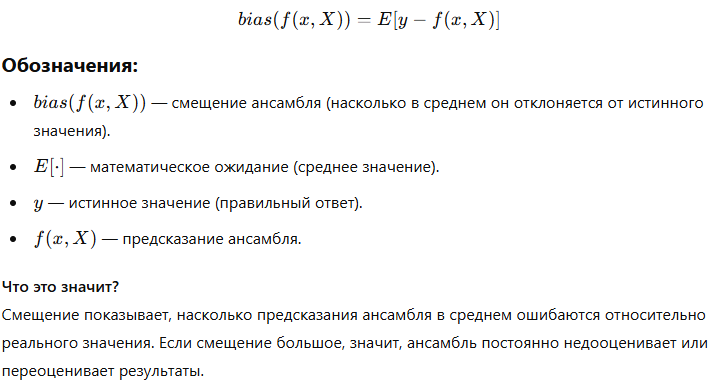

### Разброс (variance)

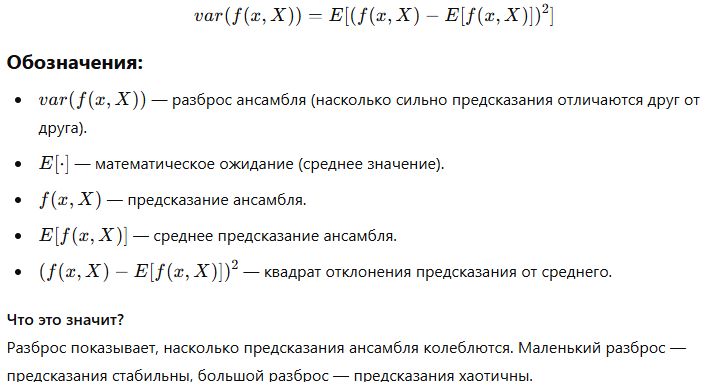

### Разброс ансамбля через базовые модели

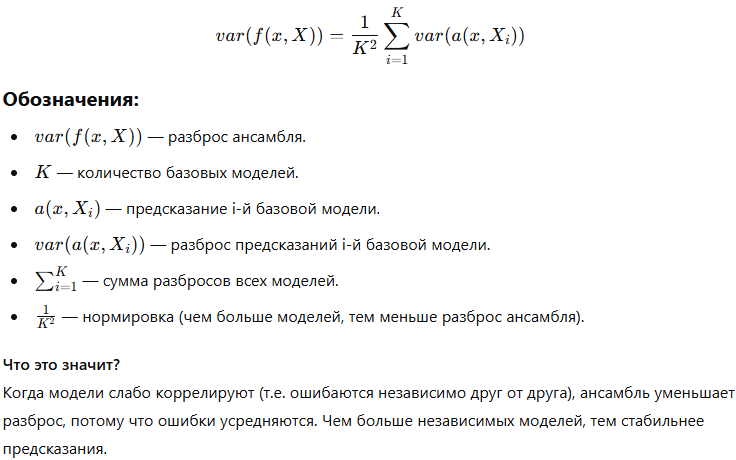

### А вот формула математического ожидания:

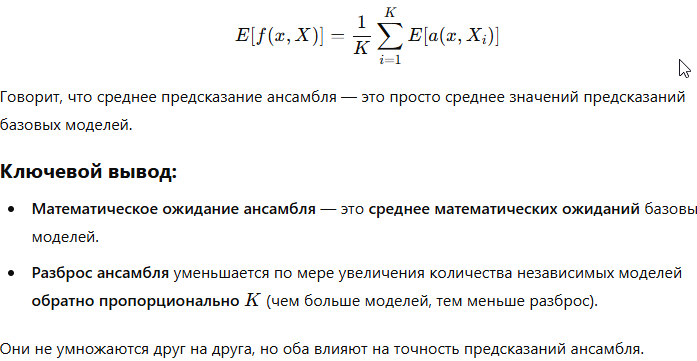

### Задание 2.6

Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться недообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

Качество предсказания по MSE для решающего дерева

In [26]:
# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=2, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)


 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=2, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

In [27]:
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')

Качество предсказания по MSE для решающего дерева 3432.45


Качество предсказания по MSE для случайного леса

In [28]:
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')

Качество предсказания по MSE для случайного леса  3203.77


### Задание 2.7

Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

Качество предсказания по MSE для решающего дерева

In [ ]:
# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=1000, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)

# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=1000, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)

# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09


In [30]:
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')

Качество предсказания по MSE для решающего дерева 6430.63


Качество предсказания по MSE для случайного леса

In [31]:
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')

Качество предсказания по MSE для случайного леса  3549.09
